In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [2]:
#read data
df_ice_cream = pd.read_csv('ice_cream.csv')

In [3]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [4]:
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production' },inplace=True)

In [5]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [6]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [7]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [8]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


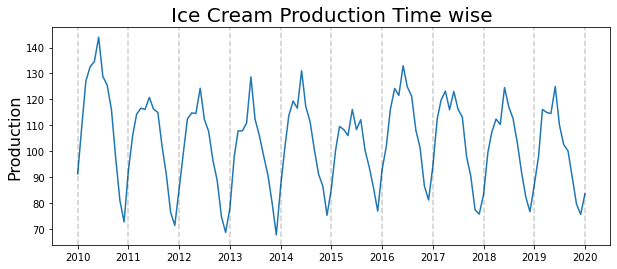

In [9]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production Time wise', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2010,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

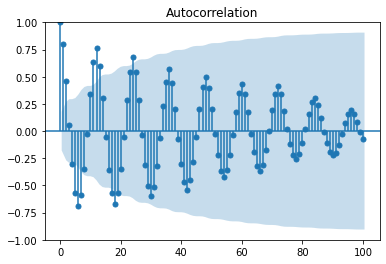

In [10]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

## Based on decaying ACF, we are likely dealing with an Auto Regressive process

# PACF

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


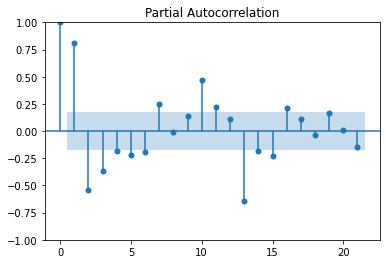

In [11]:
pacf_plot = plot_pacf(df_ice_cream.production)

## Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

# On stock data

In [12]:
import yfinance as yf

In [13]:
#define the ticker symbol
tickerSymbol = 'AAPL'

In [14]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [15]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2022-1-1')

In [16]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-31,25.466026,25.535999,24.876890,24.915262,165613600,0.0,0.0
2015-01-02,25.143237,25.154524,24.231318,24.678249,212818400,0.0,0.0
2015-01-05,24.443501,24.524761,23.793420,23.983027,257142000,0.0,0.0
2015-01-06,24.048483,24.249376,23.617352,23.985281,263188400,0.0,0.0
2015-01-07,24.197459,24.423182,24.084598,24.321608,160423600,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-27,176.605184,179.926069,176.585249,179.836319,74919600,0.0,0.0
2021-12-28,179.666777,180.833572,178.041235,178.799149,79144300,0.0,0.0
2021-12-29,178.839050,180.135494,177.652305,178.888916,62348900,0.0,0.0


In [17]:
tickerDf = tickerDf[['Close']]

In [18]:
#see your data
tickerDf.head()

,Close
Date,
2014-12-31,24.915262
2015-01-02,24.678249
2015-01-05,23.983027
2015-01-06,23.985281
2015-01-07,24.321608


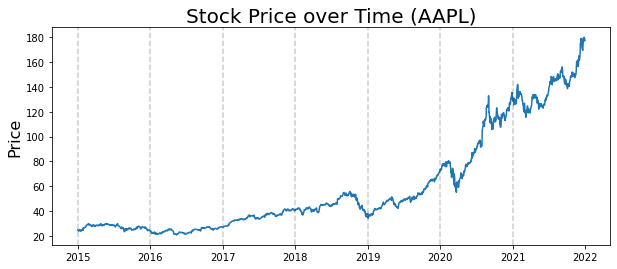

In [19]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2022):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Stationarity: take first difference of this series

In [20]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [21]:
tickerDf.Close.values[:-1]

array([ 24.91526222,  24.67824936,  23.9830265 , ..., 178.79914856,
       178.88891602, 177.71214294])

In [22]:
tickerDf.Close.values[1:]

array([ 24.67824936,  23.9830265 ,  23.98528099, ..., 178.88891602,
       177.71214294, 177.08387756])

In [23]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

C:\Users\vaibhav\AppData\Local\Temp\ipykernel_1692\2164233824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickerDf['FirstDifference'] = first_diffs


In [28]:
tickerDf.head()

,Close,FirstDifference
Date,,
2014-12-31,24.915262,-0.237013
2015-01-02,24.678249,-0.695223
2015-01-05,23.983027,0.002254
2015-01-06,23.985281,0.336327
2015-01-07,24.321608,0.934492


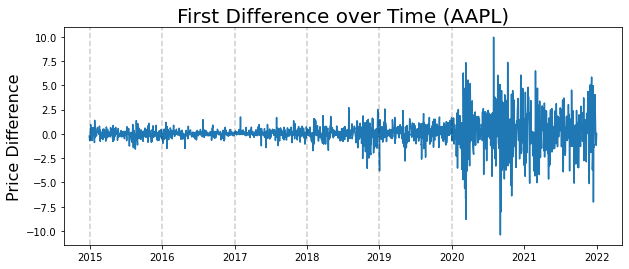

In [30]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

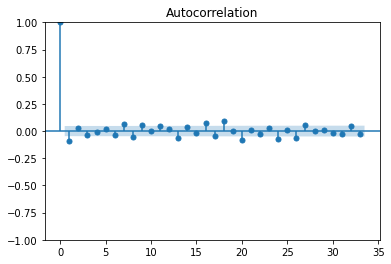

In [31]:
acf_plot = plot_acf(tickerDf.FirstDifference)

## ACF isn't that informative

# PACF

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


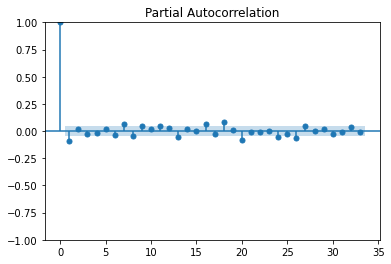

In [32]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

## PACF also doesn't tell us much